In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib as plt
from utils.quaternion import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from tqdm.notebook import tqdm

In [2]:
%matplotlib notebook

In [3]:
xsense = pd.read_csv("input/Participant_541_Setup_A_Seq_5_Trial_3.xsens.csv").iloc[1:]

/home/umcr7/project/upwork/rohit/venv36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,

In [4]:
xsense_orig = xsense.copy()
xsense = xsense[::10].reset_index(drop=True)

In [5]:
xsense.shape

(2338, 743)

In [6]:
xsense.shape

(2338, 743)

In [7]:
xsense_orientation = xsense.filter(regex='orientation', axis=1).copy()

xsense_position = xsense.filter(regex='position', axis=1).copy()

xsense_position = xsense_position.astype('float')

In [8]:
# anatomy = ["Head", "Neck", 
#            "RightShoulder", "RightUpperArm", "RightForearm", "RightHand",
#            "LeftShoulder", "LeftUpperArm", "LeftForearm", "LeftHand",
#            "L5", "L3", "T12", "T8", 
#            "Pelvis", 
#            "RightUpperLeg", "RightLowerLeg", "RightFoot", "RightToe", 
#            "LeftUpperLeg", "LeftLowerLeg", "LeftFoot", "LeftToe"]

In [9]:
# anatomy_color = {"Head": "blue", "Pelvis": "black", "L5": "brown", "L3": "brown", "T12": "brown", 
#                  "T8": "brown", "Neck": "cyan", "RightShoulder": "green", "RightUpperArm": "green", 
#                  "RightForearm": "green", "RightHand": "purple", "LeftShoulder": "green", "LeftUpperArm": "green", 
#                  "LeftForearm": "green", "LeftHand": "purple", "RightUpperLeg": "black", 
#                  "RightLowerLeg": "black", "RightFoot": "orange", "RightToe": "black", 
#                  "LeftUpperLeg" : "black", "LeftLowerLeg": "black", "LeftFoot": "orange", "LeftToe": "black"}

In [10]:
anatomy_color = {"Head": "blue", 
                 "Neck": "Cyan",
                 "UpperRight": "green",
                 "UpperLeft": "green",
                 "UpperMid": "brown",
                 "Pelvis": "black", 
                 "LowerRight": "orange",
                 "LowerLeft": "orange"
                }

In [11]:
anatomy = {
    "Head": ["Head"], "Neck": ["Neck"], 
    "UpperRight": ["RightShoulder", "RightUpperArm", "RightForearm", "RightHand"],
    "UpperLeft": ["LeftShoulder", "LeftUpperArm", "LeftForearm", "LeftHand"],
    "UpperMid": ["L5", "L3", "T12", "T8"], 
    "Pelvis": ["Pelvis"], 
    "LowerRight": ["RightUpperLeg", "RightLowerLeg", "RightFoot", "RightToe"], 
    "LowerLeft": ["LeftUpperLeg", "LeftLowerLeg", "LeftFoot", "LeftToe"]
}

In [12]:
data = np.array([])

In [15]:
data = np.append(data, [])

In [17]:
data = np.array([])
for i in range(1, 100):#xsense_position.shape[0]):
    for part in anatomy:
        data[i] = np.append(data, [])
        qr = np.array([])
        for p in anatomy[part]:
            v = np.array([(xsense_position.iloc[i]["position_{}_x".format(p)]), 
                      (xsense_position.iloc[i]["position_{}_y".format(p)]),
                      (xsense_position.iloc[i]["position_{}_z".format(p)])], dtype=np.float).reshape(-1, 3)
            qr = np.append(qr, torch.from_numpy(v).reshape(-1, 3)).reshape(-1, 3)
            x, y, z = qr[:, 0], qr[:, 1], qr[:, 2]
            data = np.append(data, [x, y, z])

IndexError: index 1 is out of bounds for axis 0 with size 0

In [23]:
from matplotlib import animation

In [24]:
vals = np.reshape(xsense_position.values, (69, -1))
RADIUS = 0.9 # space around the subject
xroot, yroot, zroot = vals[0,0], vals[0,1], vals[0,2]

In [37]:
xroot

0.101942

In [36]:
vals.a

(69, 2338)

In [ ]:
def update(num, data, line):
    for part in anatomy:
        qr = np.array([])
        for p in anatomy[part]:
            v = np.array([(xsense_position.iloc[i]["position_{}_x".format(p)]), 
                      (xsense_position.iloc[i]["position_{}_y".format(p)]),
                      (xsense_position.iloc[i]["position_{}_z".format(p)])], dtype=np.float).reshape(-1, 3)
            qr = np.append(qr, torch.from_numpy(v).reshape(-1, 3)).reshape(-1, 3)
            
        x, y, z = qr[:, 0], qr[:, 1], qr[:, 2]
#         ax.plot(x, y, z, c=anatomy_color[part])
#         ax.scatter3D(x, y, z, c=anatomy_color[part])
        line.set_data(x, y, z, c=anatomy_color[part])
        scatter.set_data(x, y, z, c=anatomy_color[part])

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)

line = ax.plot(0.01, 0.01, 1.081824, c=anatomy_color[part])
scatter = ax.scatter3D(0.01, 0.01, 1.081824, c=anatomy_color[part])

ax.set_xlim3d([-RADIUS + xroot, RADIUS + xroot])
ax.set_zlim3d([-RADIUS + zroot, RADIUS + zroot])
ax.set_ylim3d([-RADIUS + yroot, RADIUS + yroot])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.set_zticklabels([])

ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)

ani = animation.FuncAnimation(fig, update, N, fargs=(xsense_position, line, scatter), interval=10000/N, blit=False)
plt.show()

plt.legend(loc="best")
plt.show()

<IPython.core.display.Javascript object>


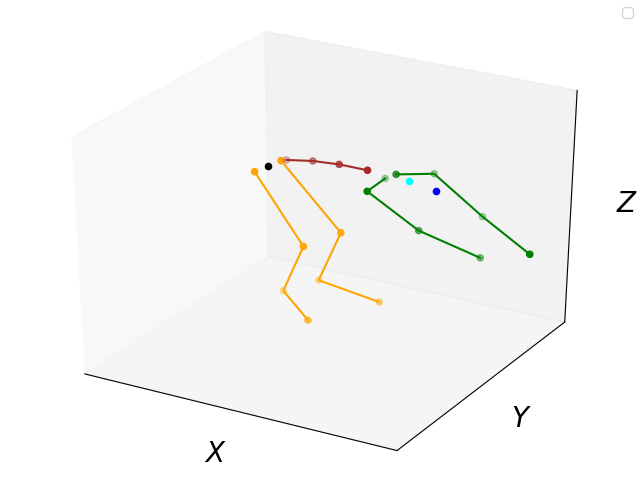

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


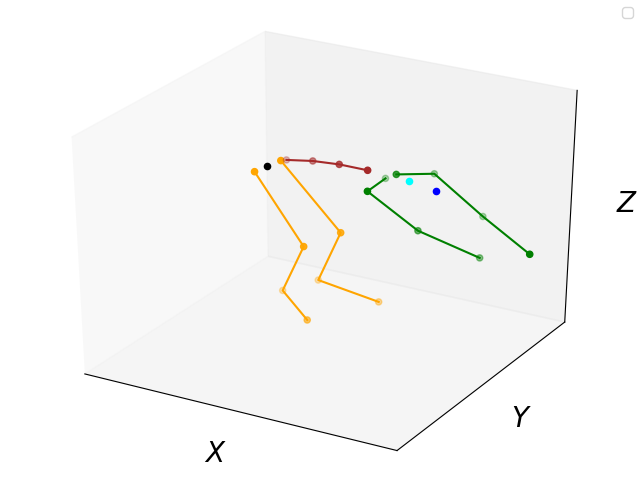

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


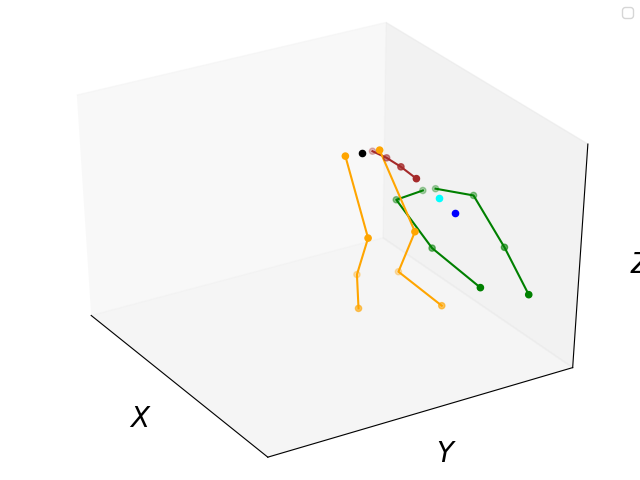

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


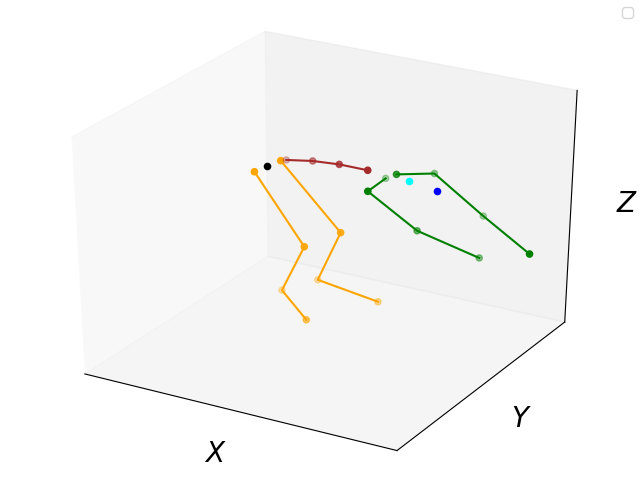

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


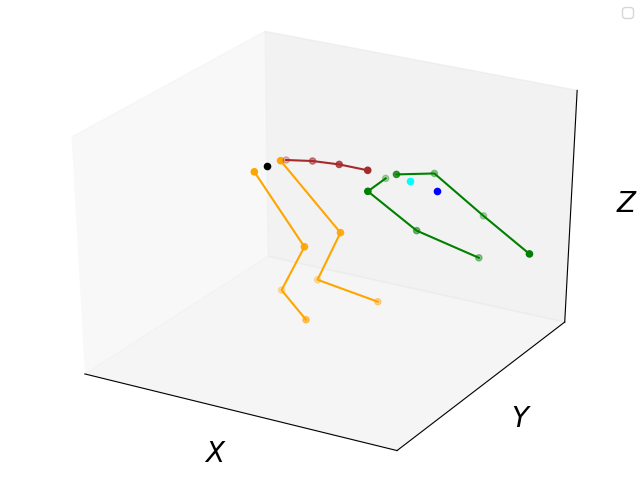

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


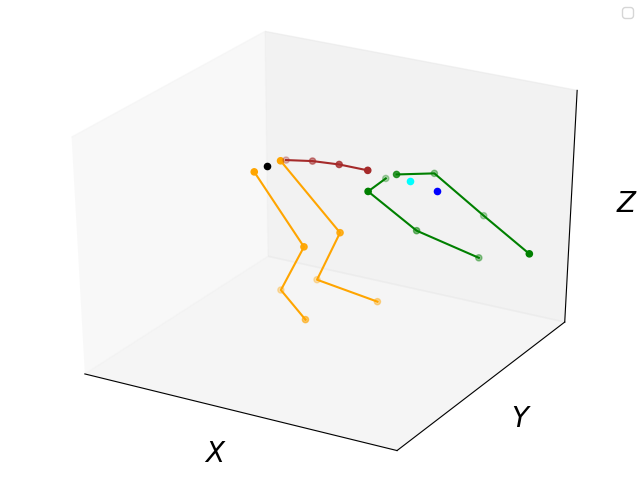

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


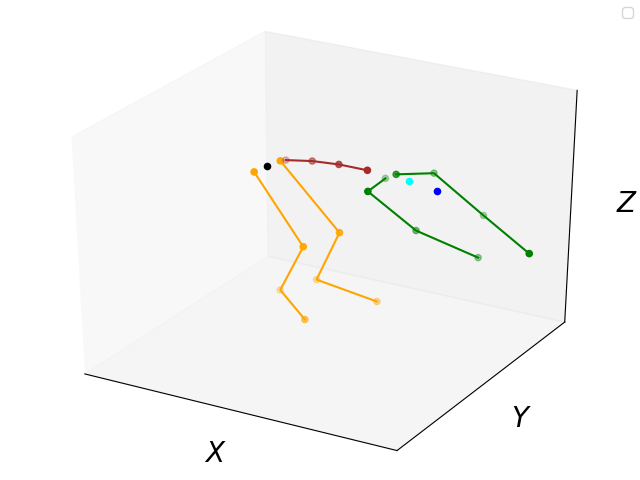

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


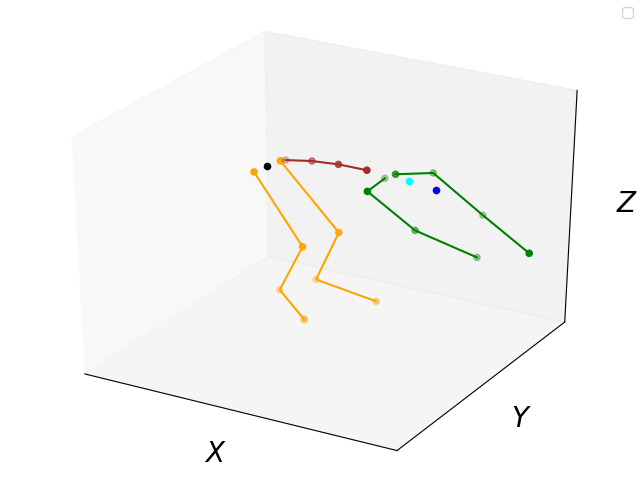

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


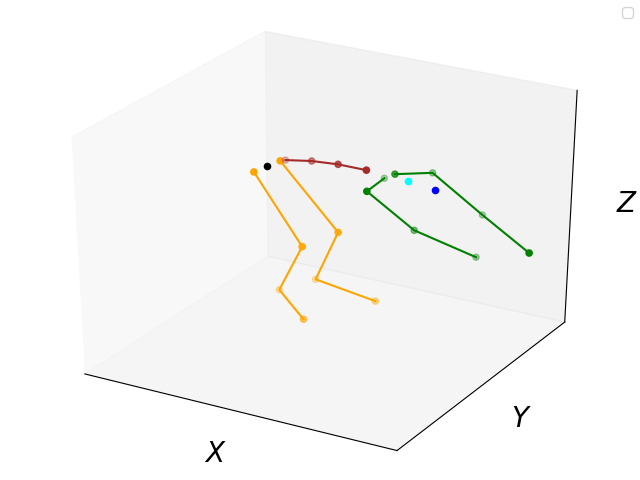

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


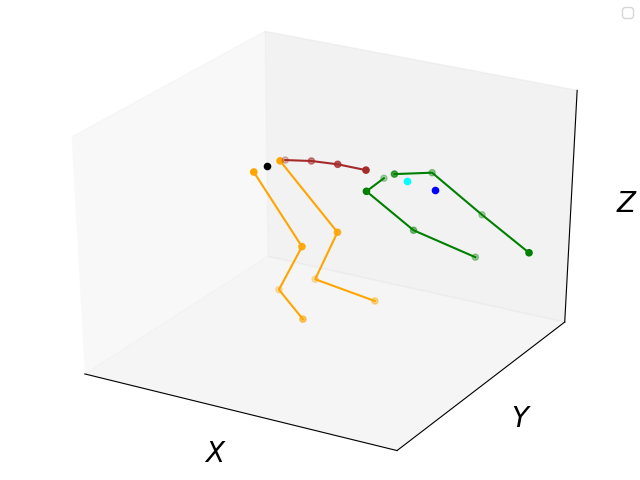

No handles with labels found to put in legend.


In [46]:


for i in range(200, 210):
    fig = plt.figure()
    ax = Axes3D(fig)
    for part in anatomy:
        qr = np.array([])
        for p in anatomy[part]:
            v = np.array([(xsense_position.iloc[i]["position_{}_x".format(p)]), 
                      (xsense_position.iloc[i]["position_{}_y".format(p)]),
                      (xsense_position.iloc[i]["position_{}_z".format(p)])], dtype=np.float).reshape(-1, 3)
            qr = np.append(qr, torch.from_numpy(v).reshape(-1, 3)).reshape(-1, 3)
            
        x, y, z = qr[:, 0], qr[:, 1], qr[:, 2]
        ax.plot(x, y, z, c=anatomy_color[part])
        ax.scatter3D(x, y, z, c=anatomy_color[part])

#     ax.set_xlim3d([-RADIUS + xroot, RADIUS + xroot])
    ax.set_zlim3d([-RADIUS + zroot, RADIUS + zroot])
    ax.set_ylim3d([-RADIUS + yroot, RADIUS + yroot])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.get_xaxis().set_ticklabels([])
    ax.get_yaxis().set_ticklabels([])
    ax.set_zticklabels([])

    ax.set_xlabel('$X$', fontsize=20)
    ax.set_ylabel('$Y$', fontsize=20)
    ax.set_zlabel('$Z$', fontsize=20)
    plt.legend(loc="best")
    plt.show()
    plt.savefig("output/frame{}.png".format(i))
    plt.close()

In [ ]:

# qr.tolist()[0][0], qr.tolist()[0][1], qr.tolist()[0][2]

In [ ]:
 # syncing video according to videos as video is 25 fps

In [ ]:
xsense.shape

In [ ]:
v_cap = cv2.VideoCapture("input/Participant_541_Setup_A_Seq_5_Trial_3.camera1.mp4")
fps = v_cap.get(cv2.CAP_PROP_FPS)
frames = v_cap.get(cv2.CAP_PROP_FRAME_COUNT)
print("frame rate {} and video lenght secs {} ".format(fps, frames // fps))

In [ ]:
# Read until video is completed 
ind = 300
while(v_cap.isOpened()): 
      
    # Capture frame-by-frame 
    ret, frame = v_cap.read() 
    if ret == True: 
        
        frame = cv2.circle(frame, (1000, 700), 10, (255, 0, 0), 3)
        ind += 1
        # Display the resulting frame
        cv2.imshow('Frame', frame) 

        # Press Q on keyboard to  exit 
        if cv2.waitKey(int(fps)) & 0xFF == ord('q'): 
            break

    # Break the loop 
    else:  
        break
        
# When everything done, release  
# the video capture object 
v_cap.release() 
   
# Closes all the frames 
cv2.destroyAllWindows() 

In [ ]:
frame.shape

In [ ]:
%%writefile ./utils/__init__.py




In [ ]:
%%writefile ./utils/quaternion.py

# Copyright (c) 2018-present, Facebook, Inc.
# All rights reserved.
#
# This source code is licensed under the license found in the
# LICENSE file in the root directory of this source tree.
#

import torch

def qrot(q, v):
    """
    Rotate vector(s) v about the rotation described by quaternion(s) q.
    Expects a tensor of shape (*, 4) for q and a tensor of shape (*, 3) for v,
    where * denotes any number of dimensions.
    Returns a tensor of shape (*, 3).
    """
    assert q.shape[-1] == 4
    assert v.shape[-1] == 3
    assert q.shape[:-1] == v.shape[:-1]

    qvec = q[..., 1:]
    uv = torch.cross(qvec, v, dim=len(q.shape)-1)
    uuv = torch.cross(qvec, uv, dim=len(q.shape)-1)
    return (v + 2 * (q[..., :1] * uv + uuv))
    
    
def qinverse(q, inplace=False):
    # We assume the quaternion to be normalized
    if inplace:
        q[..., 1:] *= -1
        return q
    else:
        w = q[..., :1]
        xyz = q[..., 1:]
        return torch.cat((w, -xyz), dim=len(q.shape)-1)

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

fig = plt.figure()
ax = p3.Axes3D(fig)

def gen(n):
    phi = 0
    while phi < 2*np.pi:
        yield np.array([np.cos(phi), np.sin(phi), phi])
        phi += 2*np.pi/n

def update(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

N = 100
data = np.array(list(gen(N))).T
line, = ax.plot(data[0, 0:1], data[1, 0:1], data[2, 0:1])

# Setting the axes properties
ax.set_xlim3d([-1.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([-1.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ani = animation.FuncAnimation(fig, update, N, fargs=(data, line), interval=10000/N, blit=False)
# ani.save('matplot003.gif', writer='imagemagick')
plt.show()

In [ ]:
line